In [2]:
# "3 Observations"
# 1) The Capomulin and Ramicane were the best drugs to reduce the tumor volume in the mice and produced the best survival rates.
# 2) A few of the drug, such as Ketapril and Naftisol, actually increased the tumor volume in the mice compared to the mice who
#    were treated with the Placebo.
# 3) Propriva performed the worst out of all the drugs. Only seven mice survived at the end of the treatment days.

In [3]:
 # Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import csv

In [4]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [5]:
# File to Load

mouse_drug_data = "C:/Users/samir/Desktop/matplotlib-challenge/mouse_drug_data.csv"
clinical_trial_data = "C:/Users/samir/Desktop/matplotlib-challenge/clinicaltrial_data.csv"




In [6]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data_df = pd.read_csv(mouse_drug_data)
clinical_trial_df = pd.read_csv(clinical_trial_data)

In [7]:
#Combine the data into a single dataset
combined_df = pd.merge(clinical_trial_df, mouse_data_df, 
                                 how='left', on='Mouse ID')
#Display the data table for preview`
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [8]:
#Update Tumor Vol
#Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
average_tumor_volume=combined_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean().reset_index()
tumor_response_df=pd.DataFrame(average_tumor_volume)
tumor_response_df.head(100)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [9]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stderror_tumor_volume = combined_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem().reset_index()
# Convert to DataFrame
standard_error_df=pd.DataFrame(stderror_tumor_volume)
# Preview DataFrame
standard_error_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [10]:
# Minor Data Munging to Re-Format the Data Frames
reshape_tumor_response_df=tumor_response_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
# Preview that Reformatting worked
reshape_tumor_response_df.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


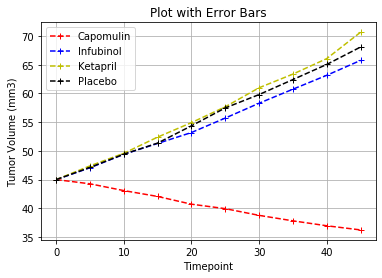

In [35]:
# Generate the Plot (with Error Bars)
#timepoint= np.arange(0, 50, 5)
#tumor_volume = np.arange(0,100,10)
drug=['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
x_axis=reshape_tumor_response_df.index
fig, ax = plt.subplots();
#ax.set_color_cycle(['red', 'black', 'yellow'])
ax.set(xlabel="Timepoint", ylabel= "Tumor Volume (mm3)", title="Plot with Error Bars")
ax.errorbar(x_axis, reshape_tumor_response_df['Capomulin'], yerr = None, linestyle="--", fmt='+', color='r', label="Capomulin")
ax.errorbar(x_axis, reshape_tumor_response_df['Infubinol'], yerr = None, linestyle="--", fmt='+', color='b', label="Infubinol")
ax.errorbar(x_axis, reshape_tumor_response_df['Ketapril'], yerr = None, linestyle="--", fmt='+', color='y', label="Ketapril")
ax.errorbar(x_axis, reshape_tumor_response_df['Placebo'], yerr = None, linestyle="--", fmt='+', color='black', label="Placebo")

ax.grid()
ax.legend(loc="best")

# Save the Figure
path=os.path.join(os.path.expanduser("~"), "Desktop", "Plot with Error Bar.png")
path
fig.savefig(path)

In [13]:
 #Metastatic Response to Treatment
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
average_met_site=combined_df.groupby(["Drug","Timepoint"])['Metastatic Sites'].mean().reset_index()

# Convert to DataFrame
met_response_df=pd.DataFrame(average_met_site)

# Preview DataFrame
met_response_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [14]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
stderr_met_site=combined_df.groupby(["Drug","Timepoint"])['Metastatic Sites'].sem().reset_index()
# Convert to DataFrame
met_response_df1=pd.DataFrame(stderr_met_site)
# Preview DataFrame
met_response_df1.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [31]:
# Minor Data Munging to Re-Format the Data Frames
reshape_met_sites_df=met_response_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
# Preview that Reformatting worked
reshape_met_sites_df.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


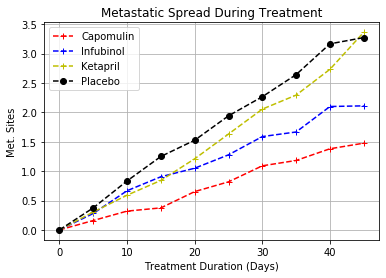

In [54]:
# Generate the Plot (with Error Bars)
x_axis=reshape_met_sites_df.index
fig2, ax2 = plt.subplots();
ax2.set(xlabel="Treatment Duration (Days)", ylabel= "Met. Sites", title="Metastatic Spread During Treatment")
ax2.errorbar(x_axis, reshape_met_sites_df['Capomulin'], yerr = None, linestyle="--", fmt='+', color='r', label="Capomulin")
ax2.errorbar(x_axis, reshape_met_sites_df['Infubinol'], yerr = None, linestyle="--", fmt='+', color='b', label="Infubinol")
ax2.errorbar(x_axis, reshape_met_sites_df['Ketapril'], yerr = None, linestyle="--", fmt='+', color='y', label="Ketapril")
ax2.errorbar(x_axis, reshape_met_sites_df['Placebo'], yerr = None, linestyle="--", fmt='o', color='black', label="Placebo")
ax2.grid()
ax2.legend(loc="best")

# Save the Figure
path=os.path.join(os.path.expanduser("~"), "Desktop", "Met Sites Plot with Error Bar.png")
path
fig.savefig(path)


In [15]:
#Survival Rates
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count=combined_df.groupby(["Drug","Timepoint"])['Mouse ID'].count().reset_index()
# Convert to DataFrame
mouse_count_df=pd.DataFrame(mouse_count)
#Rename Mouse ID to Mouse Count
mouse_count_df=mouse_count_df.rename(columns={"Mouse ID": "Mouse Count"})
# Preview DataFrame
mouse_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [50]:
# Minor Data Munging to Re-Format the Data Frames
reshape_mouse_count_df=mouse_count_df.pivot(index='Timepoint', columns='Drug', values='Mouse Count')
# Preview the Data Frame
reshape_mouse_count_df.head(100)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [53]:
#Convert survival rate into percentages
pct_survival_df=reshape_mouse_count_df.astype(float)
pct_survival_df["Capomulin_Survival_Percent"]=reshape_mouse_count_df["Capomulin"]/reshape_mouse_count_df["Capomulin"].iloc[0] * 100
pct_survival_df["Infubinol_Survival_Percent"]=reshape_mouse_count_df["Infubinol"]/reshape_mouse_count_df["Infubinol"].iloc[0] * 100
pct_survival_df["Ketapril_Survival_Percent"]=reshape_mouse_count_df["Ketapril"]/reshape_mouse_count_df["Ketapril"].iloc[0] * 100
pct_survival_df["Placebo_Survival_Percent"]=reshape_mouse_count_df["Placebo"]/reshape_mouse_count_df["Placebo"].iloc[0] * 100
pct_survival_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol,Capomulin_Survival_Percent,Infubinol_Survival_Percent,Ketapril_Survival_Percent,Placebo_Survival_Percent
Timepoint,,,,,,,,,,,,,,
0,25.0,25.0,25.0,25.0,25.0,25.0,26.0,25.0,26.0,25.0,100.0,100.0,100.0,100.0
5,25.0,21.0,25.0,23.0,23.0,24.0,25.0,25.0,25.0,24.0,100.0,100.0,92.0,96.0
10,25.0,20.0,21.0,22.0,21.0,24.0,23.0,24.0,23.0,22.0,100.0,84.0,88.0,96.0
15,24.0,19.0,21.0,19.0,21.0,20.0,17.0,24.0,23.0,21.0,96.0,84.0,76.0,80.0
20,23.0,18.0,20.0,19.0,20.0,19.0,17.0,23.0,21.0,17.0,92.0,80.0,76.0,76.0
25,22.0,18.0,18.0,19.0,18.0,17.0,14.0,23.0,19.0,16.0,88.0,72.0,76.0,68.0
30,22.0,16.0,17.0,18.0,15.0,15.0,13.0,23.0,18.0,15.0,88.0,68.0,72.0,60.0
35,22.0,14.0,12.0,17.0,15.0,14.0,10.0,21.0,16.0,14.0,88.0,48.0,68.0,56.0
40,21.0,14.0,10.0,15.0,15.0,12.0,9.0,20.0,12.0,14.0,84.0,40.0,60.0,48.0


KeyError: 'Timepoint'

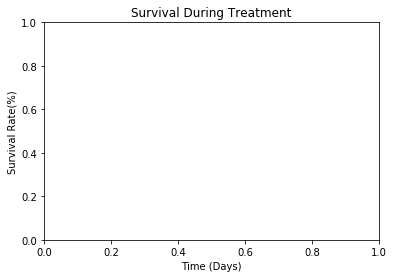

In [59]:
# Generate the Plot (Accounting for percentages)
fig3, ax3 = plt.subplots()
ax3.set(xlabel="Time (Days)", ylabel= "Survival Rate(%)", title="Survival During Treatment")
ax3.errorbar(pct_survival_df['Timepoint'], pct_survival_df['Capomulin_Survival_Percent'], yerr = None, linestyle="--", fmt='+', color='r', label="Capomulin")
ax3.errorbar(pct_survival_df['Timepoint'], pct_survival_df['Infubinol_Survival_Percent'], yerr = None, linestyle="--", fmt='+', color='b', label="Infubinol")
ax3.errorbar(pct_survival_df['Timepoint'], pct_survival_df['Ketapril_Survival_Percent'], yerr = None, linestyle="--", fmt='+', color='y', label="Ketapril")
ax3.errorbar(pct_survival_df['Timepoint'], pct_survival_df['Placebo_Survival_Percent'], yerr = None, linestyle="--", fmt='o', color='black', label="Placebo")
ax3.grid()
ax3.legend(loc="best")

# Save the Figure
path=os.path.join(os.path.expanduser("~"), "Desktop", "Survival During Treatment.png")
path
fig.savefig(path)


# Show the Figure
#plt.show()

In [18]:
#Summary Bar Graph
# Calculate the percent changes for each drug
Capomulin_percent=(reshape_tumor_response_df["Capomulin"].iloc[9]-reshape_tumor_response_df["Capomulin"].iloc[0])/reshape_tumor_response_df["Capomulin"].iloc[0]*100
Ceftamin_percent=(reshape_tumor_response_df["Ceftamin"].iloc[9]-reshape_tumor_response_df["Ceftamin"].iloc[0])/reshape_tumor_response_df["Ceftamin"].iloc[0]*100
Infubinol_percent=(reshape_tumor_response_df["Infubinol"].iloc[9]-reshape_tumor_response_df["Infubinol"].iloc[0])/reshape_tumor_response_df["Infubinol"].iloc[0]*100
Ketapril_percent=(reshape_tumor_response_df["Ketapril"].iloc[9]-reshape_tumor_response_df["Ketapril"].iloc[0])/reshape_tumor_response_df["Ketapril"].iloc[0]*100
Naftisol_percent=(reshape_tumor_response_df["Naftisol"].iloc[9]-reshape_tumor_response_df["Naftisol"].iloc[0])/reshape_tumor_response_df["Naftisol"].iloc[0]*100
Placebo_percent=(reshape_tumor_response_df["Placebo"].iloc[9]-reshape_tumor_response_df["Placebo"].iloc[0])/reshape_tumor_response_df["Placebo"].iloc[0]*100
Propriva_percent=(reshape_tumor_response_df["Propriva"].iloc[9]-reshape_tumor_response_df["Propriva"].iloc[0])/reshape_tumor_response_df["Propriva"].iloc[0]*100
Ramicane_percent=(reshape_tumor_response_df["Ramicane"].iloc[9]-reshape_tumor_response_df["Ramicane"].iloc[0])/reshape_tumor_response_df["Ramicane"].iloc[0]*100
Stelasyn_percent=(reshape_tumor_response_df["Stelasyn"].iloc[9]-reshape_tumor_response_df["Stelasyn"].iloc[0])/reshape_tumor_response_df["Stelasyn"].iloc[0]*100
Zoniferol_percent=(reshape_tumor_response_df["Zoniferol"].iloc[9]-reshape_tumor_response_df["Zoniferol"].iloc[0])/reshape_tumor_response_df["Zoniferol"].iloc[0]*100

# Store all Relevant Percent Changes into a Tuple
pct_tuple={'Capomulin': Capomulin_percent, 'Ceftamin': Ceftamin_percent, 'Infubinol': Infubinol_percent, 'Ketapril': Ketapril_percent,
          'Naftisol': Naftisol_percent, 'Placebo': Placebo_percent, 'Propriva': Propriva_percent, 'Ramicane': Ramicane_percent,
          'Stelasyn': Stelasyn_percent, 'Zoniferol': Zoniferol_percent}
# Display the data to confirm
pctchg_tumorvol=pd.Series(pct_tuple)
pctchg_tumorvol

Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [19]:
drugs=pctchg_tumorvol.keys()
drugs

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object')

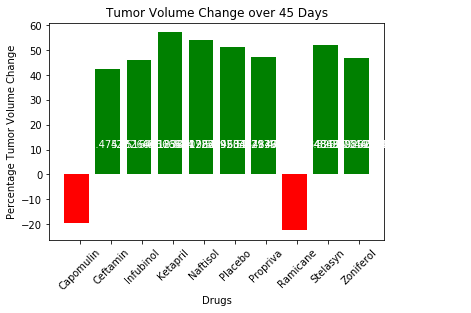

In [23]:
fig3, ax3 = plt.subplots()
x_axis = np.arange(0, len(drugs))
# Orient widths. Add labels, tick marks, etc. 
ticks=[]
for x in x_axis:
    ticks.append(x + 0.5)
plt.xticks(ticks, drugs)
# Splice data between passing and failing drugs
colors=[]
for value in pctchg_tumorvol:
     if value>=0:
            colors.append('g')
     else: 
            colors.append('r')
# Use functions to label the percentages of changes       
pct_chg_bar = ax3.bar(x_axis, pctchg_tumorvol, color=colors, align="edge")
plt.xticks(rotation=45)
ax3.set(xlabel="Drugs", ylabel="Percentage Tumor Volume Change", title="Tumor Volume Change over 45 Days")
# Call functions to implement the function calls
for i, v in enumerate(pctchg_tumorvol):
    ax3.text(i+0.5, 
              v/pctchg_tumorvol[i]+10, 
              pctchg_tumorvol[i],
              fontsize=10, 
              color='white')

# Save the Figure
path=os.path.join(os.path.expanduser("~"), "Desktop", "Tumor Vol Chg over 45 Days")
path
fig3.savefig(path)
# Show the Figure
fig3.show()